In [1]:
all_task = [ 'icd_infection', 'icd_neoplasms', 'icd_endocrine', 'icd_blood', 'icd_mental', 'icd_nervous',
         'icd_circulatory', 'icd_respiratory', 'icd_digestive', 'icd_genitourinary', 'icd_pregnancy',
         'icd_skin', 'icd_musculoskeletal', 'icd_congenital', 'icd_ill_defined','icd_injury', 'disch_24h', 'disch_48h', 'mort_24h', 'mort_48h',
         'Long LOS', 'Readmission 30', 'Final Acuity Outcome',  'dnr_24h', 'dnr_48h', 'cmo_24h', 'cmo_48h']
select_task_idx = 11 #specify the task index here

In [2]:
import torch
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def tsne_plot_2d(label, embeddings,title,anchor_xy, color = None,words=[],show_legend=True,save_fig=True, a=0.7,col=1):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    x = embeddings[:,0]
    y = embeddings[:,1]
    cmap = matplotlib.cm.get_cmap('coolwarm')
    colors = cm.rainbow(np.linspace(0, 1, len(y)))
    if color is None:
        c1 = (x - np.min(x)+0.1)/(np.max(x) - np.min(x))
        c2 = (y - np.min(y))/(np.max(y) - np.min(y))
        c = (c1+c2)/2
    else:
        c = color
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(c[i]), label=label[i],s=80)
    if(show_legend==True):
        plt.legend(bbox_to_anchor=(anchor_xy[0], anchor_xy[1]),ncol=col)
    plt.grid(True)
    print(plt.gca().get_ylim())
    x_axis, y_axis = plt.gca().get_xlim(), plt.gca().get_ylim()
    if(save_fig ==True):
        plt.savefig(title+'.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.show()
    return c , x_axis ,y_axis

import torch
import numpy as np
from sklearn.manifold import TSNE
import copy
import warnings
warnings.filterwarnings("ignore")


In [3]:
dataset = '27tasks'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)
perf = pd.read_csv('./gain_data/27tasks/27tasks_y.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/27tasks/27tasks_x.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
perf=perf[new_index]

(-36.55844052179904, 26.834271960938825)


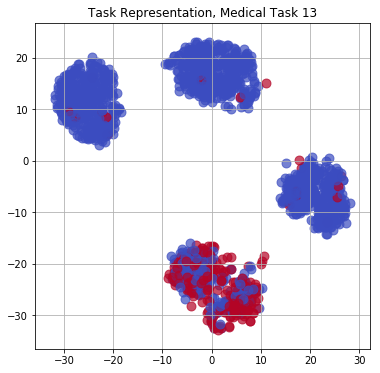

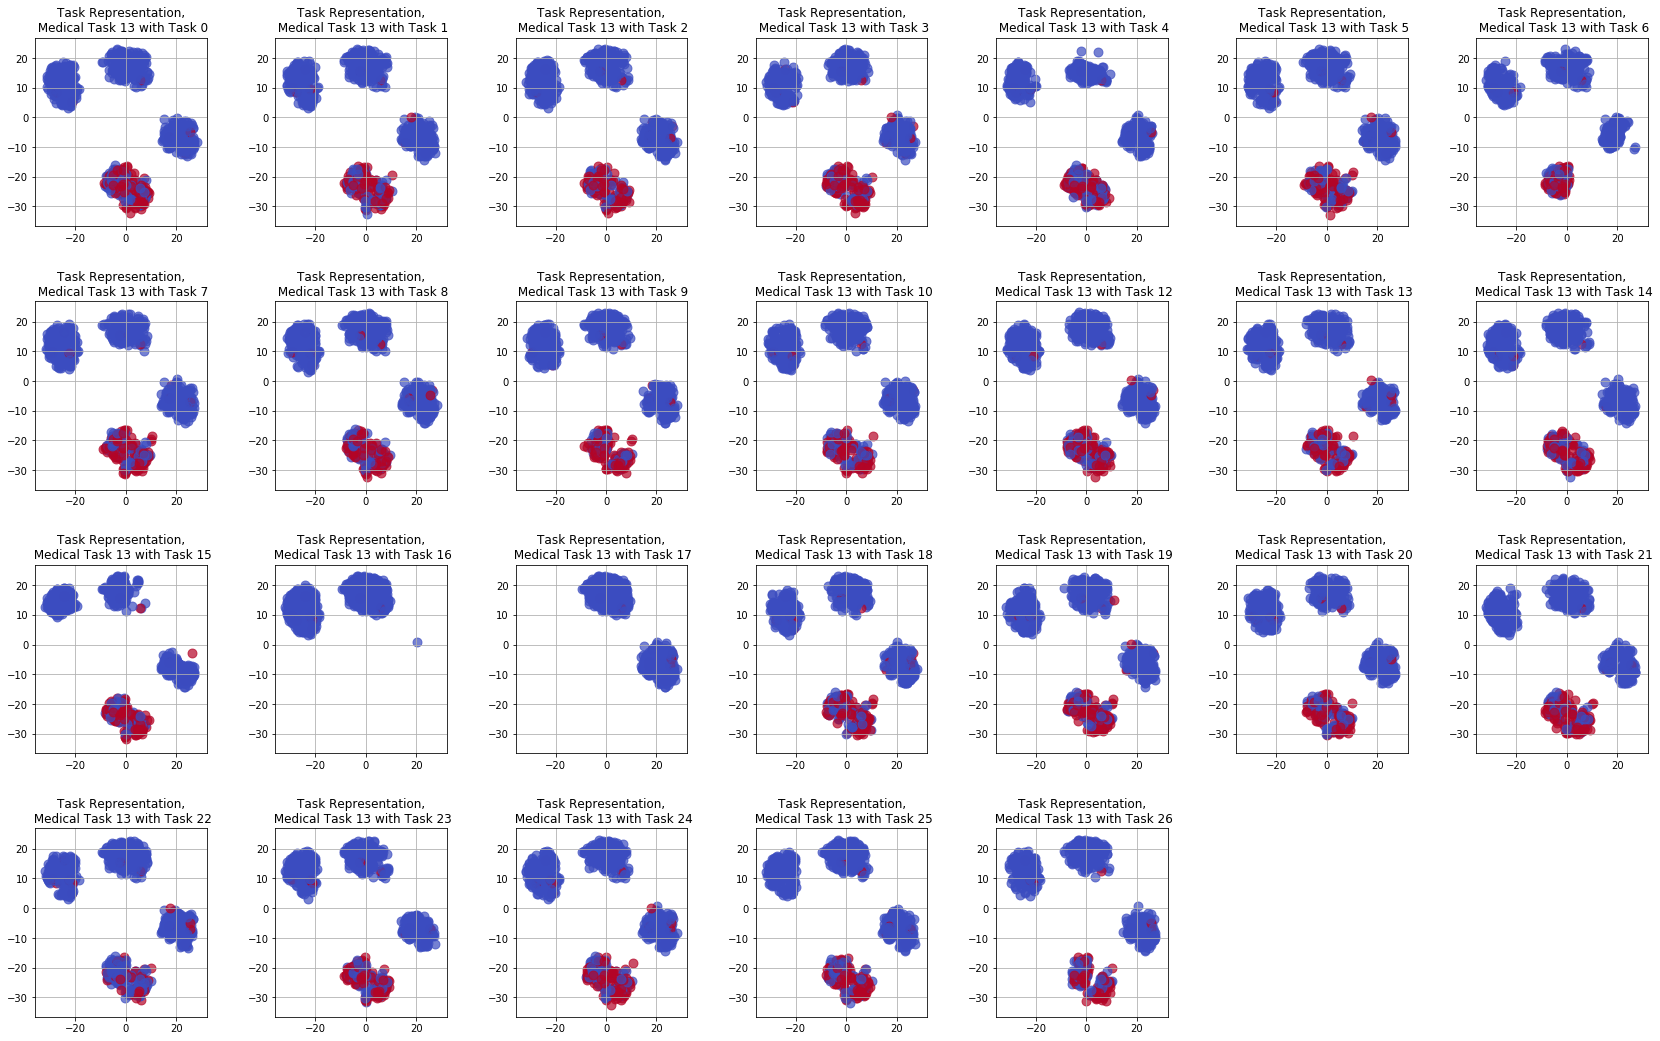

In [16]:
all_comb = np.concatenate((train_visual,test_visual),axis=0)
selected_comb = all_comb[np.where(all_comb[:,select_task_idx,:].sum(1)!=0)]
X = selected_comb[:,select_task_idx,:]
X_embedded = TSNE(n_components=2,perplexity=75, random_state=3).fit_transform(X)
_perf = copy.deepcopy(perf)
sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
_perf = _perf[sel_idx]
_perf = _perf[:,select_task_idx]
for i in range(len(_perf)):
    if(_perf[i]>0):
        _perf[i] = _perf[i]/np.max(_perf[i])
    else:
        _perf[i] = -1*(_perf[i]/np.min(_perf[i]))
keys = list(range(len(X)))
task_embedd_c, x_axis, y_axis =tsne_plot_2d(keys,X_embedded,color = _perf,title='Task Representation, Medical Task 13',show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)
plt.figure(figsize=(28, 17))
figure_idx = 1
for j in range(27):
    if(j == select_task_idx):
        continue
    plt.subplot(4,7,figure_idx)
    figure_idx = figure_idx + 1
    X_embedded_withi = X_embedded[np.where(selected_comb[:,j,:].sum(1)!=0)]
    keys = list(range(len(X_embedded_withi)))
    label = keys
    anchor_xy = [1.05, 0.9]
    show_legend=True
    save_fig=False
    a = 1
    col = 1
    x = X_embedded_withi[:,0]
    y = X_embedded_withi[:,1]
    cmap = matplotlib.cm.get_cmap('coolwarm')
    colors = cm.rainbow(np.linspace(0, 1, len(y)))
    _perf = copy.deepcopy(perf)
    sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
    _perf = _perf[sel_idx]
    sel_idx = np.where(selected_comb[:,j,:].sum(1)!=0)[0]
    _perf = _perf[sel_idx]
    X = selected_comb[:,select_task_idx,:]
    _perf = _perf[:,select_task_idx]
    for i in range(len(_perf)):
        if(_perf[i]>0):
            _perf[i] = _perf[i]/np.max(_perf[i])
        else:
            _perf[i] = -1*(_perf[i]/np.min(_perf[i]))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=0.7,color=cmap(_perf[i]), label=label[i],s=80)
    plt.gca().set_ylim(y_axis)
    plt.gca().set_xlim(x_axis)
    plt.grid(True)
    plt.title('Task Representation,\n Medical Task 13 with Task '+str(j))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()